# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
# A number of the activities could be optimised through the use of a function that can be called iteratively. 

# Its important to identify and clean up data before analysing it.

# There is a relatively even spread of the mice observed across the different drug regimens however the mean tumour size volumes for Ramicane and Capomulin are significantly lower than that of the other drugs. This suggests that both regimen may be more effective in addressing tumour growth. 
 

In [3]:
%matplotlib widget
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge( study_results, mouse_metadata,how="left", on=["Mouse ID"])

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata)
print("The number of mice is: ",str(number_of_mice))

The number of mice is:  249


In [4]:
# Find the number of records in the combined data
number_records_combined = len(combined_df)
print("The number of combined records: ", str(number_records_combined))

The number of combined records:  1893


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mouse_id_df = pd.DataFrame(mouse_metadata['Mouse ID'].unique().tolist())
#unique_mouse_id_df


In [6]:
# unique_timepoint_df = pd.DataFrame(study_results['Timepoint'].unique().tolist())
# unique_timepoint_df

In [7]:
duplicated_mouseid_timepoint = combined_df.duplicated(['Mouse ID','Timepoint']).tolist()
duplicated_mouseid_timepoint = pd.DataFrame(duplicated_mouseid_timepoint)
duplicated_mouseid_timepoint = duplicated_mouseid_timepoint.loc[(duplicated_mouseid_timepoint[0] == True)]
duplicated_mouseid_timepoint_records = combined_df.iloc[duplicated_mouseid_timepoint.index]
duplicated_mouseid_timepoint_records
#duplicated_mouseid= duplicated_mouseid_timepoint_records['Mouse ID'].unique


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
duplicated_mouseid= duplicated_mouseid_timepoint_records['Mouse ID'].unique().tolist()
print(duplicated_mouseid)


['g989']


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicated_mouse_timepoint_dat = combined_df.loc[(combined_df['Mouse ID'] isin duplicated_mouseid)]
#df.loc[df['column_name'].isin(some_values)]
duplicated_mouse_timepoint_data = combined_df.loc[combined_df['Mouse ID'].isin(duplicated_mouseid)]
duplicated_mouse_timepoint_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
#count the number of rows with the the mouse id that had duplicated timepoints
count_duplicated_records = len(duplicated_mouse_timepoint_data)
print("\n Summary of data cleanup \n","=========================\n","Total records: ", str(number_records_combined) , "%\n Duplicated records: ",str(count_duplicated_records), "\n Expected Clean Records: ", str(number_records_combined - count_duplicated_records ) )


 Summary of data cleanup 
 Total records:  1893 %
 Duplicated records:  13 
 Expected Clean Records:  1880


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Using drop() to delete rows based on column value
clean_combined_df = pd.concat([combined_df,duplicated_mouse_timepoint_data],axis=0,ignore_index = False).drop_duplicates(keep=False)
clean_combined_df
#print(len(clean_combined_df))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_combined_df['Mouse ID'].nunique()
print("The number of mice in the cleaned dataframe is:", str(mice_count))

The number of mice in the cleaned dataframe is: 248


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean_median_var = clean_combined_df.groupby(['Drug Regimen'], as_index = False).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'], 'Mouse ID': 'count'})
drug_regimen_mean_median_var

Drug Regimen Tumor Volume (mm3)                                            \
                             mean     median        var       std       sem   
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346   
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821   
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236   
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860   
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466   
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331   
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332   
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955   
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111   
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398   

  Mouse ID  
     count  
0      230  
1      178  
2      178  
3      188  
4      186  
5      181  
6      148  
7      228  
8      181  
9      182

In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_mean_median_var = clean_combined_df.groupby(['Drug Regimen'], as_index = False).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'], 'Mouse ID': 'count'})
drug_regimen_mean_median_var = pd.DataFrame(drug_regimen_mean_median_var)
print(drug_regimen_mean_median_var['Tumor Volume (mm3)']['median'])


0    41.557809
1    51.776157
2    51.820584
3    53.698743
4    52.509285
5    52.288934
6    50.446266
7    40.673236
8    52.431737
9    51.818479
Name: median, dtype: float64


## Bar and Pie Charts

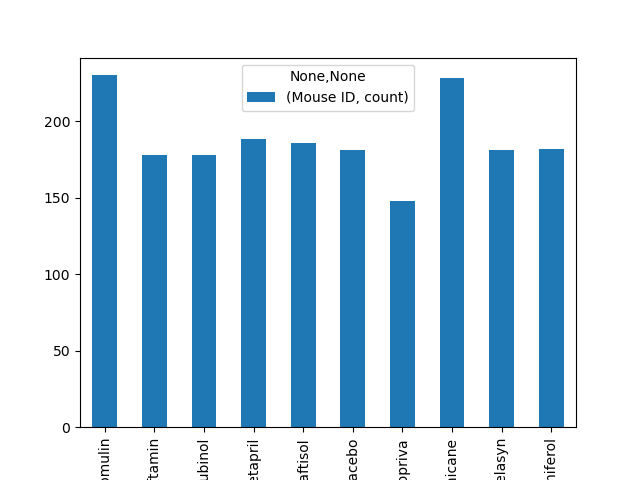

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_mean_median_var.plot(x = 0, y= 6, kind = 'bar')
plt.show()
plt.savefig('Figure 1')


In [16]:
 # Tell matplotlib where we would like to place each of our x axis headers


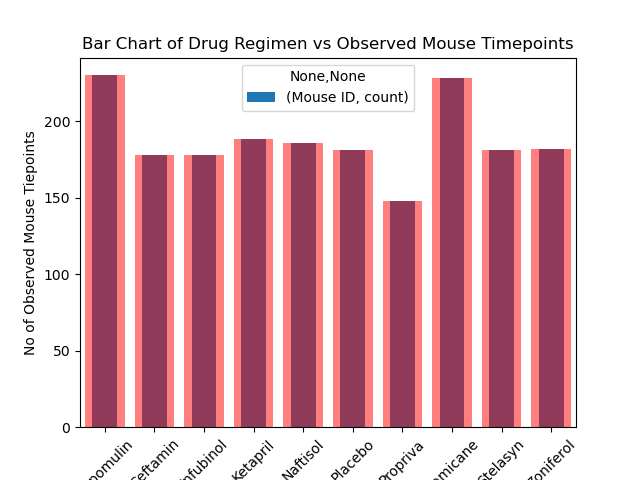

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data_rows = drug_regimen_mean_median_var['Mouse ID']['count']
#print(str(data_rows))
row_index = drug_regimen_mean_median_var['Drug Regimen']
#print(row_index)
number_of_rows = len(data_rows)
#print(str(number_of_rows))
y_data = data_rows
x_axis = np.arange(len(data_rows))
plt.bar(x_axis,y_data,color ='r', alpha = 0.5, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, row_index, rotation = 45)
plt.title('Bar Chart of Drug Regimen vs Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('No of Observed Mouse Tiepoints')
plt.show()
plt.savefig('Figure 2')

In [18]:
clean_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#drug_regimen_mean_median_var = clean_combined_df.groupby(['Drug Regimen'], as_index = False).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'], 'Mouse ID': 'count'})
female_vs_male = clean_combined_df.groupby(['Sex'], as_index = False)['Mouse ID'].count()
#female_vs_male = clean_combined_df.groupby(['Sex'], as_index = False)
female_vs_male_df = pd.DataFrame(female_vs_male)
female_vs_male_df.rename(columns = {"Mouse ID" :"Mice Count"})
updated_female_vs_male_df = female_vs_male_df.set_index('Sex', drop = False)
updated_female_vs_male_df = updated_female_vs_male_df.rename(columns = {"Mouse ID" :"Mice Count"})
#df.rename(columns={"A": "a", "B": "c"})
updated_female_vs_male_df





,Sex,Mice Count
Sex,,
Female,Female,922
Male,Male,958


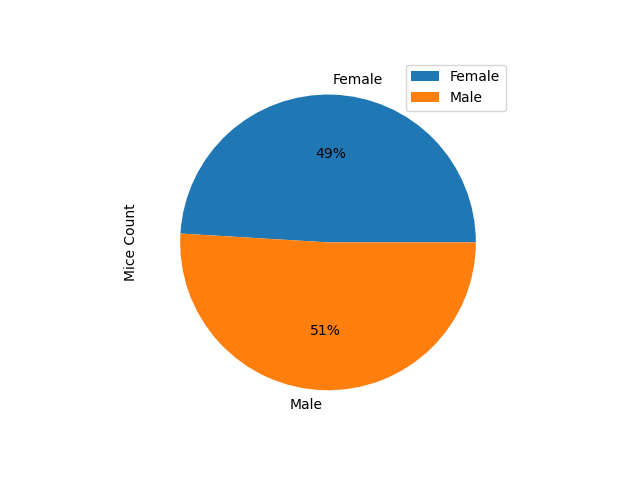

In [20]:
updated_female_vs_male_df.plot(y= 1, kind = 'pie', autopct='%1.0f%%')
plt.show()
plt.savefig('Figure 3')

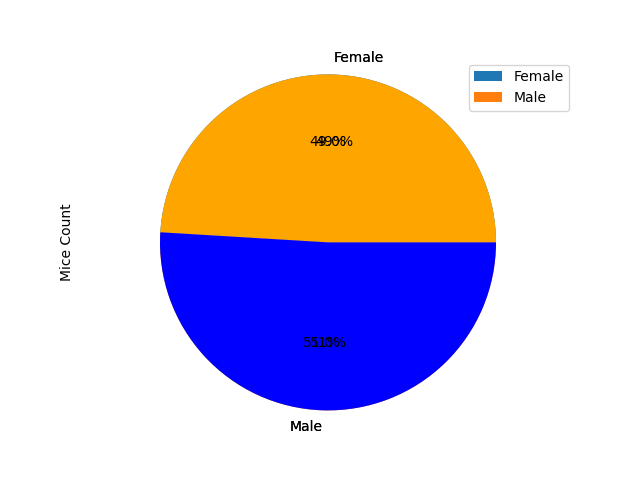

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data_rows = updated_female_vs_male_df['Mice Count']
#print(str(pie_data_rows))
# Labels for the sections of our pie chart
#labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]
labels = updated_female_vs_male_df.index.to_list()
#print(labels)

# The values of each section of the pie chart
sizes = pie_data_rows.to_list()
#print(sizes)

# The colours of each section of the pie chart
colours =  ["orange", "blue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%")
plt.axis("equal")
plt.show()
plt.savefig('Figure 4')

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_clean_df = clean_combined_df.sort_values(['Mouse ID', 'Timepoint'], ascending = [True, False])
print(str(len(sorted_clean_df)))
#sorted_clean_df.head()
regimen_full_list = []


1880


In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimen_full_list_df = pd.DataFrame(regimen_full_list)
#for k in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
for k in ["Capomulin","Infubinol","Infubinol","Ceftamin"]:
    regimen_df = sorted_clean_df.loc[(sorted_clean_df['Drug Regimen'] == k)]
    #capomulin_df
    regimen_mice_list = regimen_df['Mouse ID'].unique()
    #print(str(len(capomulin_mice_list)))
    regimen_mice_count = regimen_df['Mouse ID'].nunique()
    #print(str(capomulin_mice_count))
    #j = 0
    #list = capomulin_df.loc[(capomulin_df['Mouse ID'] = capomulin_mice_list(j)) | (capomulin_df['TimePoint'] is max)]
    #regimen_full_list_df =pd.DataFrame(full_list)
    for j in regimen_mice_list:
        #print(j)
        regimen_mice_specific_record = regimen_df.loc[(regimen_df['Mouse ID'] == j)]
        regimen_mice_specific_record = regimen_mice_specific_record.query('Timepoint == Timepoint.max()')
        regimen_mice_specific_record_df = pd.DataFrame(regimen_mice_specific_record)
        #print(mice_specific_record, "\n")
        regimen_full_list = np.append(regimen_full_list, regimen_mice_specific_record)
        regimen_full_list_df = pd.concat([regimen_full_list_df, regimen_mice_specific_record_df], axis = 0)
        #print(regimen_full_list_df)
#full_list_df= pd.DataFrame(full_list)
#full_list_df
print(regimen_full_list_df)
#print(str(len(regimen_full_list_df)))


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1764     b128         45           38.982878                 2    Capomulin   
1829     b742         45           38.939633                 0    Capomulin   
930      f966         20           30.485985                 0    Capomulin   
1777     g288         45           37.074024                 1    Capomulin   
1791     g316         45           40.159220                 2    Capomulin   
...       ...        ...                 ...               ...          ...   
217      x226          0           45.000000                 0     Ceftamin   
1855     x581         45           64.634949                 3     Ceftamin   
1862     x822         45           61.386660                 3     Ceftamin   
1767     y769         45           68.594745                 4     Ceftamin   
1766     y865         45           64.729837                 3     Ceftamin   

         Sex  Age_months  Weight (g)  
1764  Female

In [24]:
# generage for 

[45.         46.79525728 48.91385977 ... 61.43389223 58.63497149
 72.55523894]


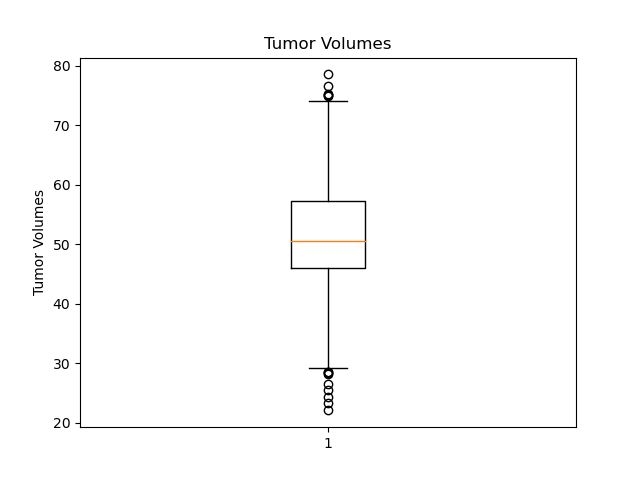

In [25]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []
tumor_volume_data = clean_combined_df['Tumor Volume (mm3)'].unique()
print(tumor_volume_data)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Tumor Volumes')
ax1.boxplot(tumor_volume_data)
plt.show()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_group = clean_combined_df.groupby['Drug Regimen'].unique()
drug_regimen_tumor = clean_combined_df.groupby(['Drug Regimen'], as_index = False).agg(['Tumor Volume (mm3)']: 'count')
# for k in treatment_group:
#   treatment_volume = clean_combined_df.loc[(clean_combined_df(["Drug Regmin"] == treatment_group))]
 
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Tennis Batting Cage')
# ax1.set_ylabel('Tumor Volumes')
# ax1.boxplot(tumor_volume_data)
# plt.show()

SyntaxError: invalid syntax (1366346687.py, line 3)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
